In [ ]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('oral_cancer_prediction_dataset.csv')
df = df.replace({'Yes' : 1 , 'No' : 0 })
df['Gender'] = df['Gender'].replace({ 'Female' : 1 , 'Male' : 0 })


x = df[['Age' , 'Tobacco Use' , 'Alcohol Consumption' , 'HPV Infection', 'Betel Quid Use' , 'Chronic Sun Exposure' ,'Poor Oral Hygiene' , 'Family History of Cancer' , 'Compromised Immune System' , 'Oral Lesions' ,'White or Red Patches in Mouth']]
y = df['Oral Cancer (Diagnosis)']


x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2, random_state= 42 )

rf = RandomForestClassifier( n_estimators = 200 , random_state= 42 )

rf.fit(x_train , y_train)

print("öZELLİK öNEMLERİ : " , rf.feature_importances_)

y_pred = rf.predict(x_test)

print(accuracy_score(y_pred , y_test))
print(confusion_matrix(y_pred , y_test))
print(f1_score(y_pred , y_test))
print(classification_report(y_pred, y_test))

paramgrid = { 
    "n_estimators" : [100 , 200 , 300 , 500] ,
    "max_depth" : [ 3 , 5 , 7 , None, 15 ]}


gridsearch = GridSearchCV( estimator = rf, 
                         param_grid = paramgrid, 
                         cv = 5 , 
                         scoring = "accuracy",
                         n_jobs = 1)

gridsearch.fit(x_train , y_train)


print( "EN İYİ PARAMETRE" , gridsearch .best_params_)
print( "En iyi cross validation skoru" , gridsearch.best_score_)

bestmodel = gridsearch.best_estimator_

y_pred = bestmodel.predict(x_test)

print(classification_report(y_pred, y_test))






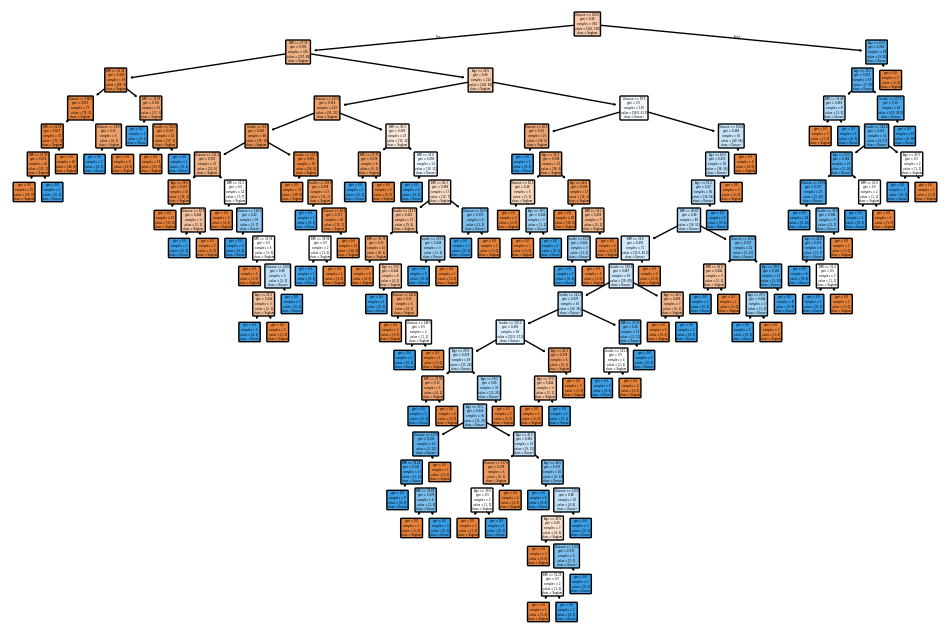

0.7109375
[[197  54]
 [ 57  76]]
0.5779467680608364
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       251
           1       0.58      0.57      0.58       133

    accuracy                           0.71       384
   macro avg       0.68      0.68      0.68       384
weighted avg       0.71      0.71      0.71       384

Her fold için doğruluk skoru: [0.6953125 0.6953125 0.71875  ]
Ortalama doğruluk skoru :  0.703125
EN İYİ PARAMETRE {'max_depth': 5}
En iyi cross validation skoru 0.7474238180120533
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       258
           1       0.74      0.76      0.75       126

    accuracy                           0.83       384
   macro avg       0.81      0.82      0.81       384
weighted avg       0.83      0.83      0.83       384



In [6]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn import tree

df = df.replace({'Yes' : 1 , 'No' : 0 })
x = df[['Glucose' , 'Insulin' , 'BMI' , 'Age' ]]
y = df['Outcome']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.5, random_state= 42 )

dt = DecisionTreeClassifier(max_depth = 100 , random_state = 42)
dt.fit(x_train ,y_train ) 

scores = cross_val_score(dt , x, y, cv = 3)

plt.figure(figsize =(12,8))
tree.plot_tree(dt, feature_names = x.columns, class_names = ["Sağlam" , "Kanser" ] ,filled = True , rounded = True )
plt.show()

y_pred = dt.predict(x_test)

print(accuracy_score(y_pred , y_test))
print(confusion_matrix(y_pred , y_test))
print(f1_score(y_pred , y_test))
print(classification_report(y_pred, y_test))
print("Her fold için doğruluk skoru:", scores)
print("Ortalama doğruluk skoru : " , scores.mean())


paramgrid = { 
    "max_depth" : [ 3 , 5 , 7 , None, 15 ]}


gridsearch = GridSearchCV( estimator = DecisionTreeClassifier(random_state = 42), 
                         param_grid = paramgrid, 
                         cv = 5 , 
                         scoring = "accuracy")

gridsearch.fit(x, y )

print( "EN İYİ PARAMETRE" , gridsearch .best_params_)
print( "En iyi cross validation skoru" , gridsearch.best_score_)

bestmodel = gridsearch.best_estimator_

y_pred = bestmodel.predict(x_test)

print(classification_report(y_pred, y_test))




In [50]:

import pandas as pd

df = pd.read_csv("diabetes.csv")

from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df = df.replace({'Yes' : 1 , 'No' : 0 })
x = df[['Glucose' , 'Insulin' , 'BMI' , 'Age' ]]
y = df['Outcome']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2, random_state= 42 )

knn = KNeighborsClassifier(n_neighbors = 21)

knn.fit(x_train , y_train)

y_pred = knn.predict(x_test)

print(accuracy_score(y_pred , y_test))
print(confusion_matrix(y_pred , y_test))
print(f1_score(y_pred , y_test))
print(classification_report(y_pred, y_test))

pipe = Pipeline([
    ("Scaler" , StandardScaler()),
    ("knn" , KNeighborsClassifier()) ])

paramgrid = {
    "knn__n_neighbors" : list(range(1 , 32 , 2 )),
    "knn__weights" : ["uniform" , "distance"] , 
    "knn__algorithm" : ["auto"] }

cv = StratifiedKFold( n_splits = 5 , shuffle = True , random_state = 42 )

grid = GridSearchCV(
    estimator = pipe , 
    param_grid = paramgrid, 
    cv=cv, 
    scoring = "accuracy", 
    n_jobs = 1 )


grid.fit(x, y )

print( "EN İYİ PARAMETRE" , grid.best_params_)
print( "En iyi cross validation skoru" , grid.best_score_)

bestmodel = grid.best_estimator_

y_pred = bestmodel.predict(x_test)

print(classification_report(y_pred, y_test))


    






0.7207792207792207
[[79 23]
 [20 32]]
0.5981308411214953
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       102
           1       0.58      0.62      0.60        52

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154

EN İYİ PARAMETRE {'knn__algorithm': 'auto', 'knn__n_neighbors': 21, 'knn__weights': 'uniform'}
En iyi cross validation skoru 0.7668109668109668
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       104
           1       0.64      0.70      0.67        50

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.78      0.77      0.78       154

